# COVID19 DATASET

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

## About the data

- Province_State - The name of the State within the USA.


- Country_Region - The name of the Country (US).


- Last_Update - The most recent date the file was pushed.


- Lat - Latitude.


- Long_ - Longitude.


- Confirmed - Aggregated confirmed case count for the state.


- Deaths - Aggregated Death case count for the state.


- Recovered - Aggregated Recovered case count for the state.


- Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).


- FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.


- Incident_Rate - confirmed cases per 100,000 persons.


- People_Tested - Total number of people who have been tested.


- People_Hospitalized - Total number of people hospitalized.


- Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.


- UID - Unique Identifier for each row entry.


- ISO3 - Officialy assigned country code identifiers.


- Testing_Rate - Total number of people tested per 100,000 persons.


- Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.

__All of the below data is recorded on 21st May 2020 on the same time i.e 02.32 hours__  

In [1]:
# Importing the data

import pandas as pd 
import numpy as np

df = pd.read_csv(r'C:\Users\User\Desktop\Projects\csse_covid_19_daily_reports_us.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


#### Splitting the column 'Last_Update' into two seperate columns i.e Date and Time respectively

In [2]:
df['Dates'] = pd.to_datetime(df['Last_Update']).dt.date
df['Time'] = pd.to_datetime(df['Last_Update']).dt.time
df.drop(['Last_Update'],axis=1,inplace=True)

#### Dropping any duplicate entry

In [3]:
df[df.duplicated(keep='first')].shape\
# Can be seen that there are no duplicate entries

(0, 19)

In [4]:
# Checking the shape of the data
df.shape

(58, 19)

In [5]:
df.nunique()

Province_State          58
Country_Region           1
Lat                     56
Long_                   56
Confirmed               58
Deaths                  56
Recovered               42
Active                  58
FIPS                    58
Incident_Rate           56
People_Tested           56
People_Hospitalized     33
Mortality_Rate          57
UID                     58
ISO3                     6
Testing_Rate            56
Hospitalization_Rate    33
Dates                    1
Time                     1
dtype: int64

#### Checking which column has a single data level

In [6]:
temp = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        temp.append(col)
        
temp

['Country_Region', 'Dates', 'Time']

From the above output we know that the columns 'Country_Region', 'Dates' and 'Time' have just a single data entry, i.e all the recorded entries are from the same date, time and country

In [7]:
df.isnull().sum()

Province_State           0
Country_Region           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
Dates                    0
Time                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Lat                   56 non-null     float64
 3   Long_                 56 non-null     float64
 4   Confirmed             58 non-null     int64  
 5   Deaths                58 non-null     int64  
 6   Recovered             42 non-null     float64
 7   Active                58 non-null     float64
 8   FIPS                  58 non-null     int64  
 9   Incident_Rate         56 non-null     float64
 10  People_Tested         56 non-null     float64
 11  People_Hospitalized   33 non-null     float64
 12  Mortality_Rate        57 non-null     float64
 13  UID                   58 non-null     int64  
 14  ISO3                  58 non-null     object 
 15  Testing_Rate          56 

The dataset has 58 entries, 18 feature columns and 1 target column. 4 of the 18 features are 64 bit integers, 10 are 64 bit floats, 5 are object type including the target column.

In [9]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


- The columns Lat, Long, Recovered, Incident_rate, People_Tested, People_tested, People_Hospitalized, Mortality_Rate, Testing_Rate and Hospitalization_Rate have null values.

In [10]:
df.describe(include=['O'])

,Province_State,Country_Region,ISO3,Dates,Time
count,58,58,58,58,58
unique,58,1,6,1,1
top,Utah,US,USA,2020-05-21,02:32:54
freq,1,58,53,58,58


- The Province_State has unique values for each entry.


- Country_Region, Dates and Time have only one data level

# Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

### Univariate Analysis

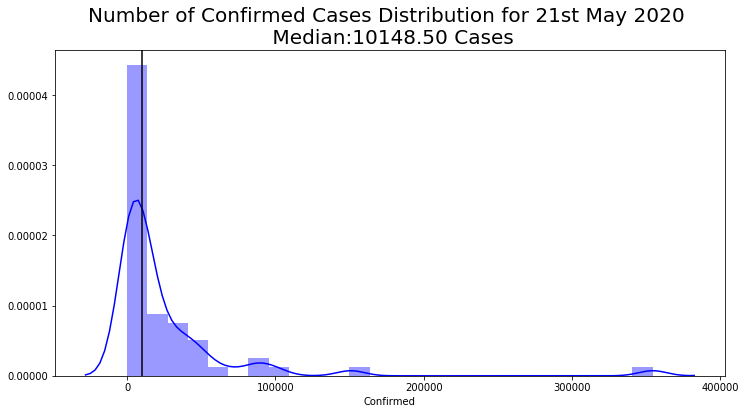

In [12]:
plt.subplots(figsize=(12,6))
sns.distplot(df['Confirmed'],color='blue')
plt.title('Number of Confirmed Cases Distribution for 21st May 2020 \n Median:{0:.2f} Cases'.format(df['Confirmed'].median()),size=20)
plt.axvline(df['Confirmed'].median(),color='black',label='Median')

The average number of confirmed cases on 21st May 2020 in the USA are 10,148

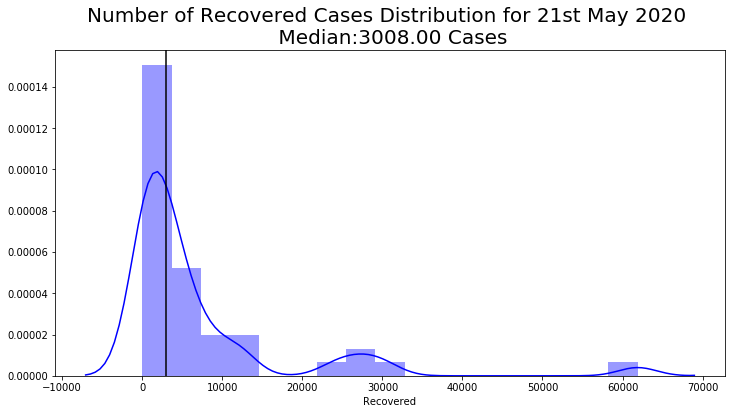

In [13]:
plt.subplots(figsize=(12,6))
sns.distplot(df['Recovered'],color='blue')
plt.title('Number of Recovered Cases Distribution for 21st May 2020 \n Median:{0:.2f} Cases'.format(df['Recovered'].median()),size=20)
plt.axvline(df['Recovered'].median(),color='black',label='Median')

The average number of recovered cases on 21st May 2020 in the USA are 3008

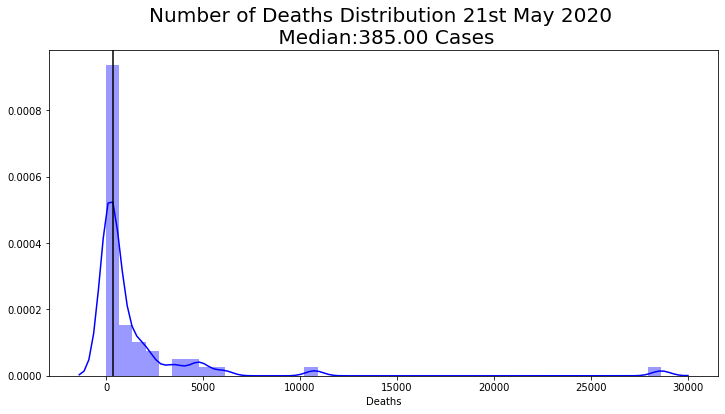

In [14]:
plt.subplots(figsize=(12,6))
sns.distplot(df['Deaths'],color='blue')
plt.title('Number of Deaths Distribution 21st May 2020 \n Median:{0:.2f} Cases'.format(df['Deaths'].median()),size=20)
plt.axvline(df['Deaths'].median(),color='black',label='Median')

The average number of deaths recorded on 21st May 2020 in the USA are 385

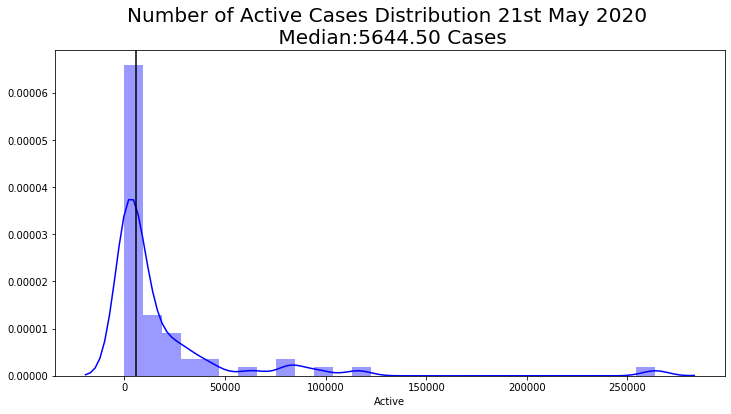

In [15]:
plt.subplots(figsize=(12,6))
sns.distplot(df['Active'],color='blue')
plt.title('Number of Active Cases Distribution 21st May 2020 \n Median:{0:.2f} Cases'.format(df['Active'].median()),size=20)
plt.axvline(df['Active'].median(),color='black',label='Median')

The average number of active cases on 21st May 2020 in the USA are 5,644

### Bivariate Analysis

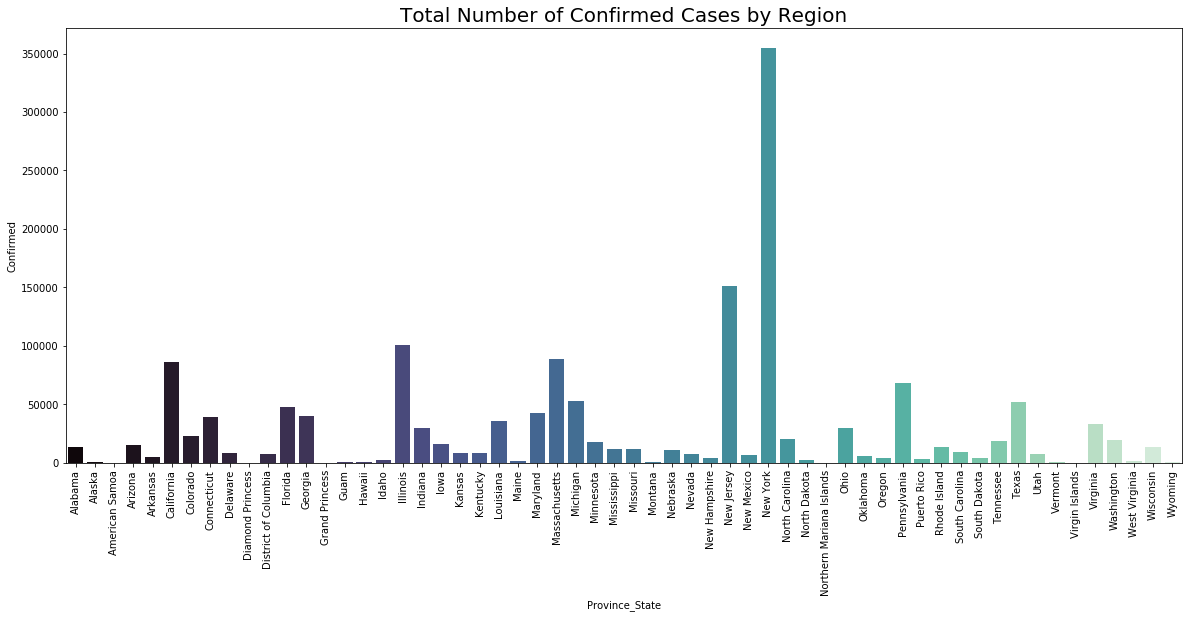

In [16]:
plt.figure(figsize=(20,8))
plt.title("Total Number of Confirmed Cases by Region",size=20)
sns.barplot(x="Province_State", y="Confirmed", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

- __New York__ recorded the highest number of confirmed cases on 21st May


- __New Jersy and Illinois__ recorded the second and the third highest number respectively of confirmed cases on 21st May


- Even though USA recorded the highest number of Covid19 cases, the distribution on cases is not uniform.

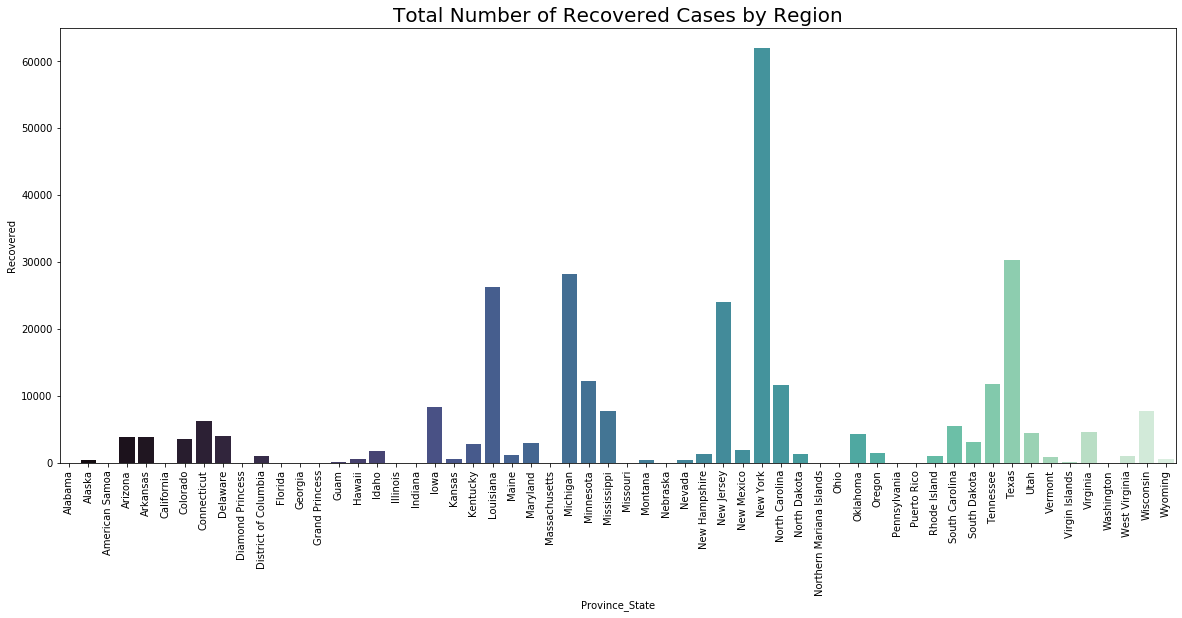

In [17]:
plt.figure(figsize=(20,8))
plt.title("Total Number of Recovered Cases by Region",size=20)
sns.barplot(x="Province_State", y="Recovered", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

- __New York__ recorded the highest number of recovered cases on 21st May


- __Texas and Michigan__ recorded the second and the third highest number respectively of recovered cases on 21st May


- Recovery rate for the regions __Louisiana, Michigan, New Jersy, New York and Texas__ have very high recocery cases.

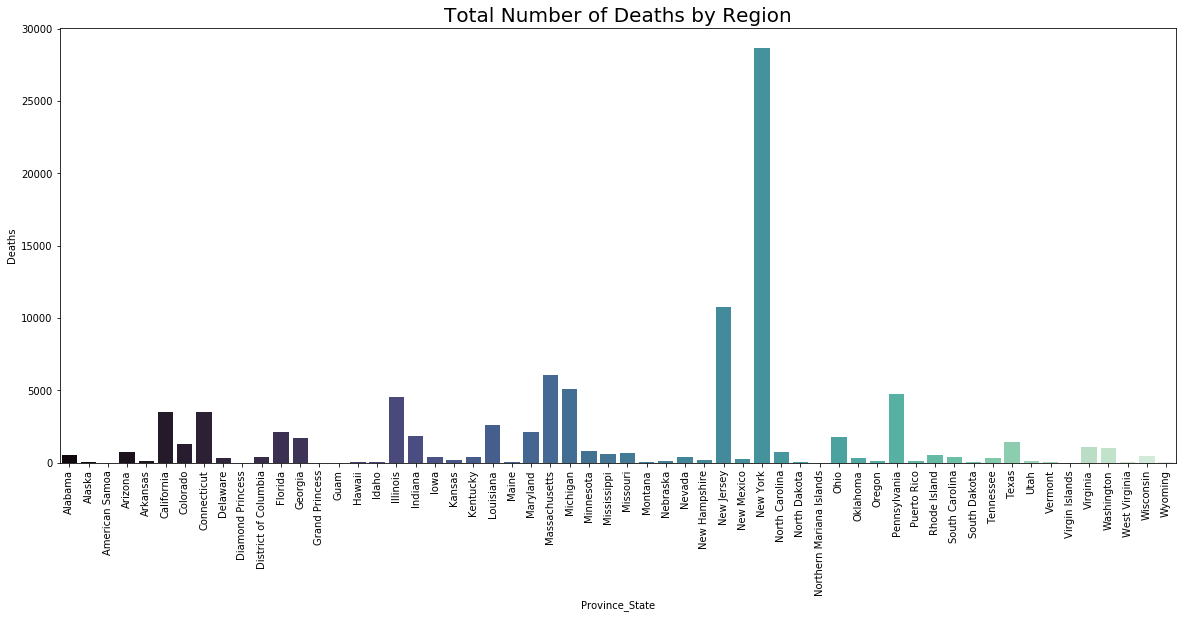

In [18]:
plt.figure(figsize=(20,8))
plt.title("Total Number of Deaths by Region",size=20)
sns.barplot(x="Province_State", y="Deaths", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

- __New York__ recorded the highest number of death cases on 21st May


- __New Jersy and Pennsylvania__ recorded the second and the third highest number respectively of recovered cases on 21st May


- Most of the regions recorded very low deaths

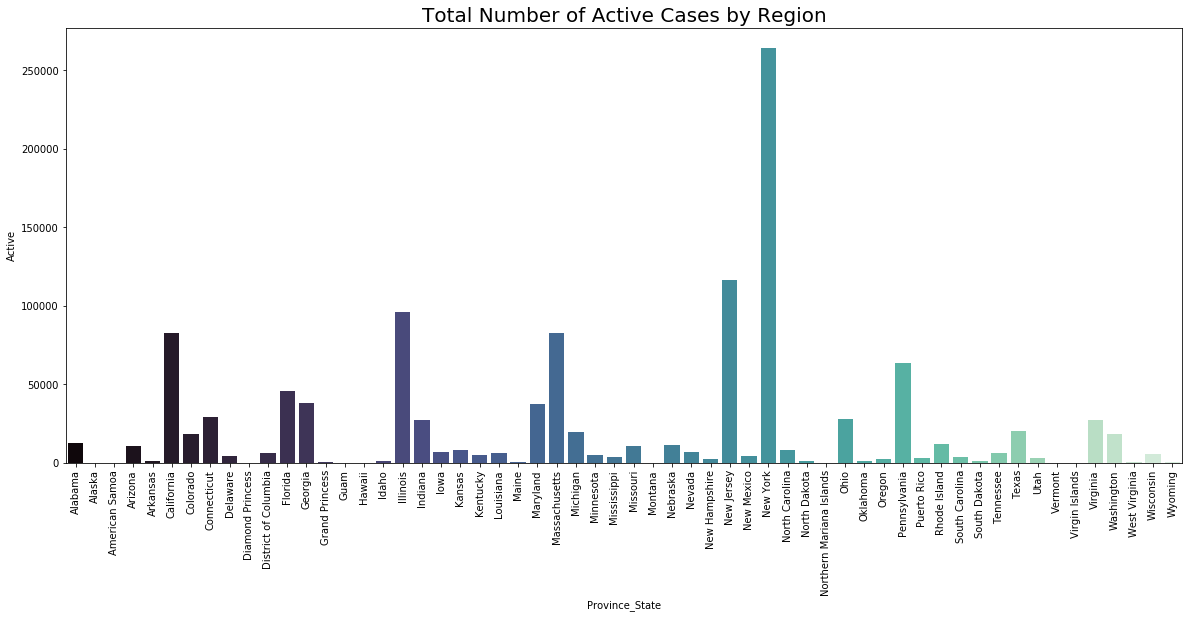

In [19]:
plt.figure(figsize=(20,8))
plt.title("Total Number of Active Cases by Region",size=20)
sns.barplot(x="Province_State", y="Active", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

- __New York__ recorded the highest number of Active cases on 21st May


- __New Jersy and Illinois__ recorded the second and the third highest number respectively of active cases on 21st May


- Number of active for the regions __California, Illinois, Massachusetts, New Jersy and New York__ have very high active cases.

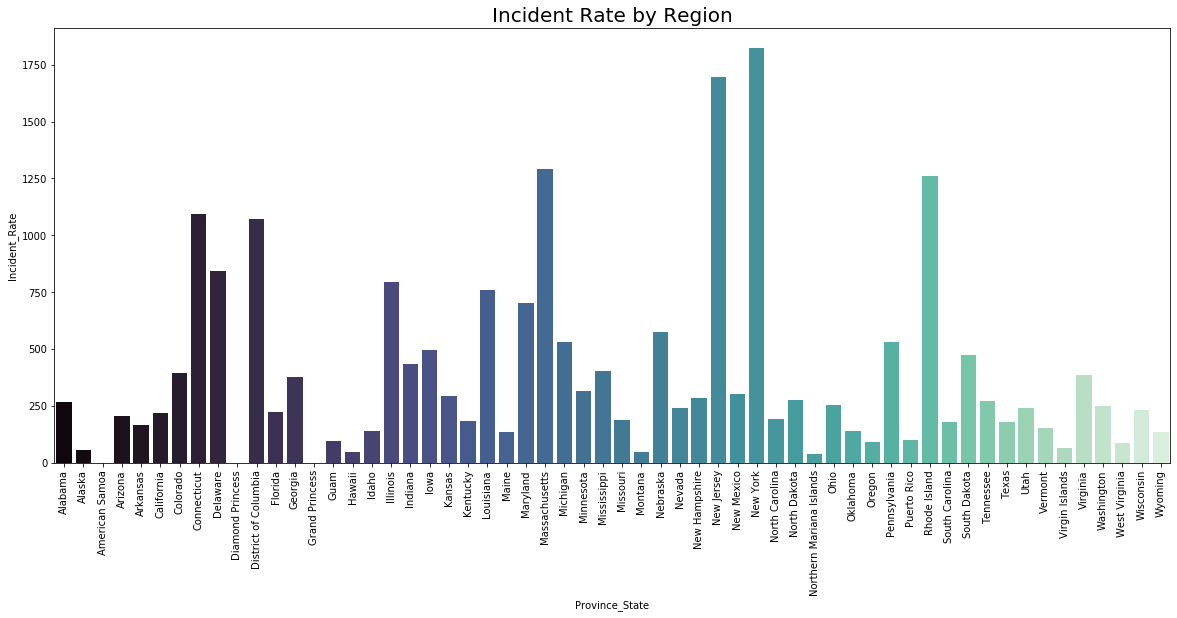

In [20]:
plt.figure(figsize=(20,8))
plt.title("Incident Rate by Region",size=20)
sns.barplot(x="Province_State", y="Incident_Rate", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

- __New York__ has the highest Incident rate 


- __New Jersy and Massachusetts__ recorded the second and the third highest Incident rate


- Even though the number of cases are very uneven across all the regions, the incident rate is fairly high which means that even though maybe on 21st the cases for rest of the regions weren't high however probably high on other dates.

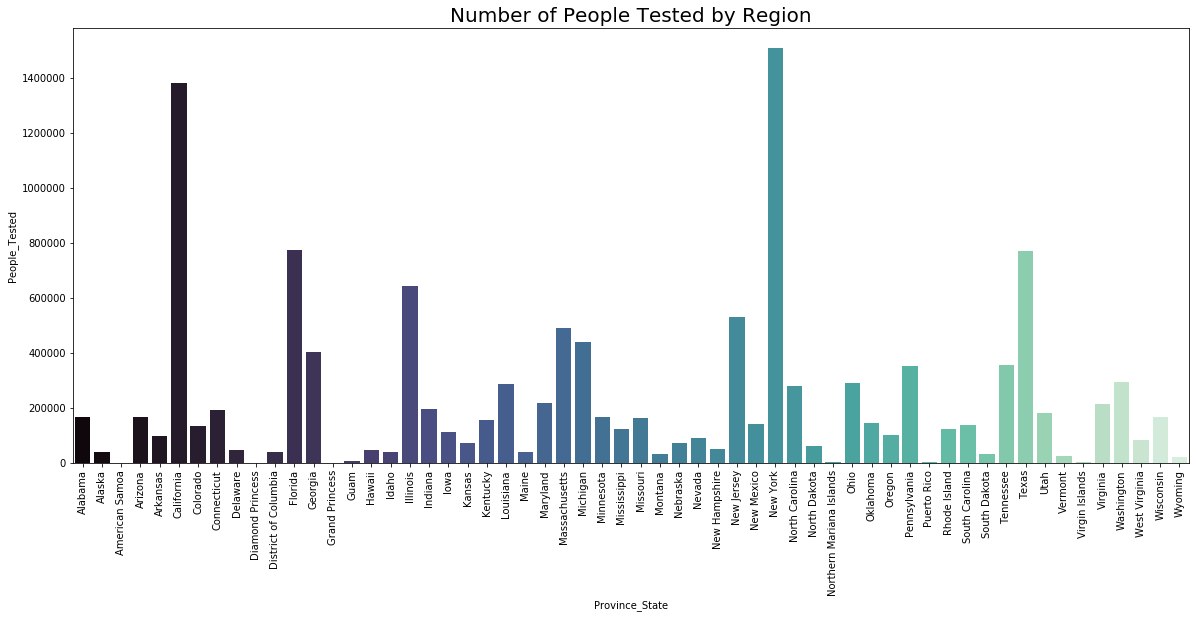

In [21]:
plt.figure(figsize=(20,8))
plt.title("Number of People Tested by Region",size=20)
sns.barplot(x="Province_State", y="People_Tested", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

- __New York__ has the highest number of people who were tested for Covid19 


- __California and Texas__ recorded the second and the third highest number of people who were tested for Covid19


- Even though USA has the highest number of Covid19 cases the testing is not very high among all the regions.

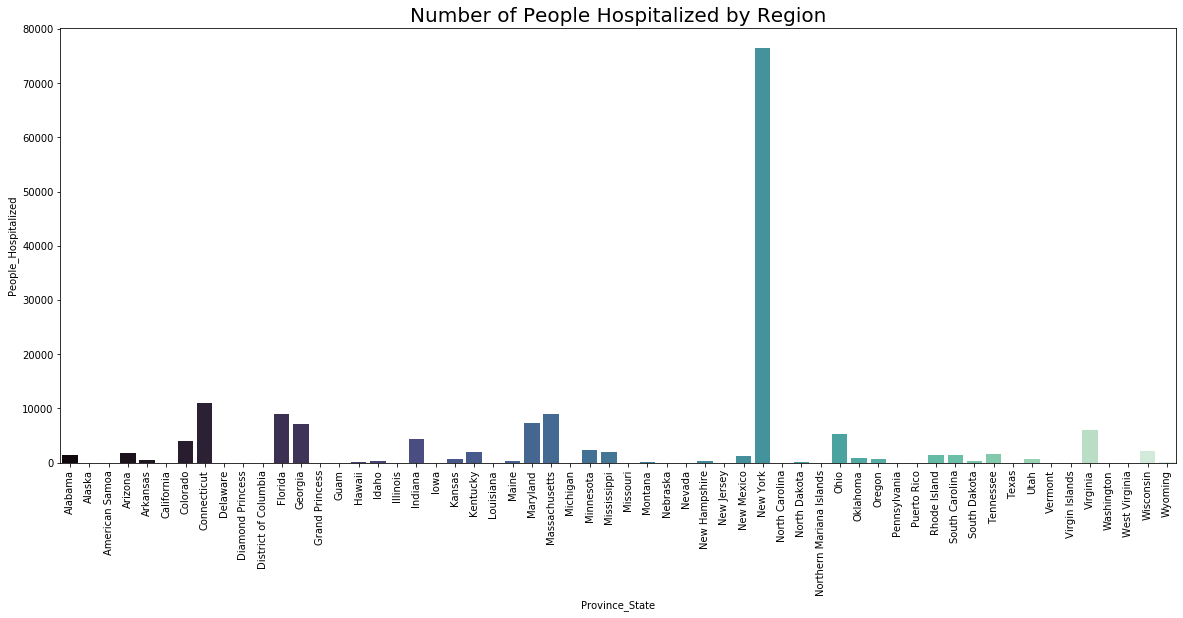

In [22]:
plt.figure(figsize=(20,8))
plt.title("Number of People Hospitalized by Region",size=20)
sns.barplot(x="Province_State", y="People_Hospitalized", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

- __New York__ has the highest number of people who were hospitalized due to Covid19 


- Even though USA has the highest number of Covid19 cases the number of people who were hospitalized due to Covid19 is not very high among all the regions.

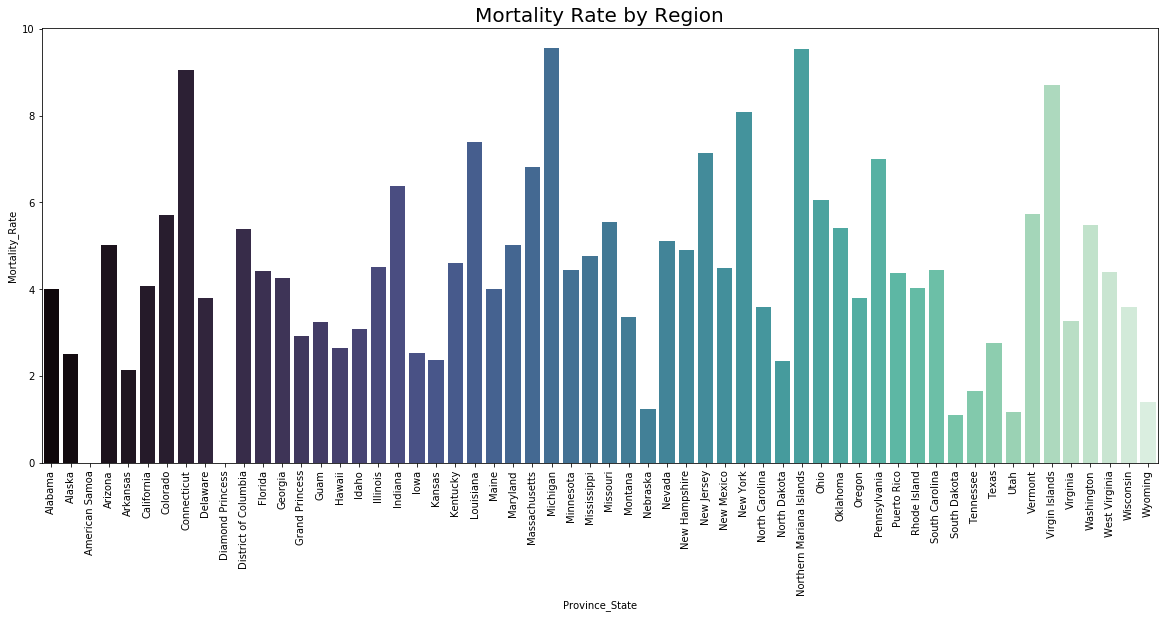

In [23]:
plt.figure(figsize=(20,8))
plt.title("Mortality Rate by Region",size=20)
sns.barplot(x="Province_State", y="Mortality_Rate", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

- The Mortality rate is high among all regions

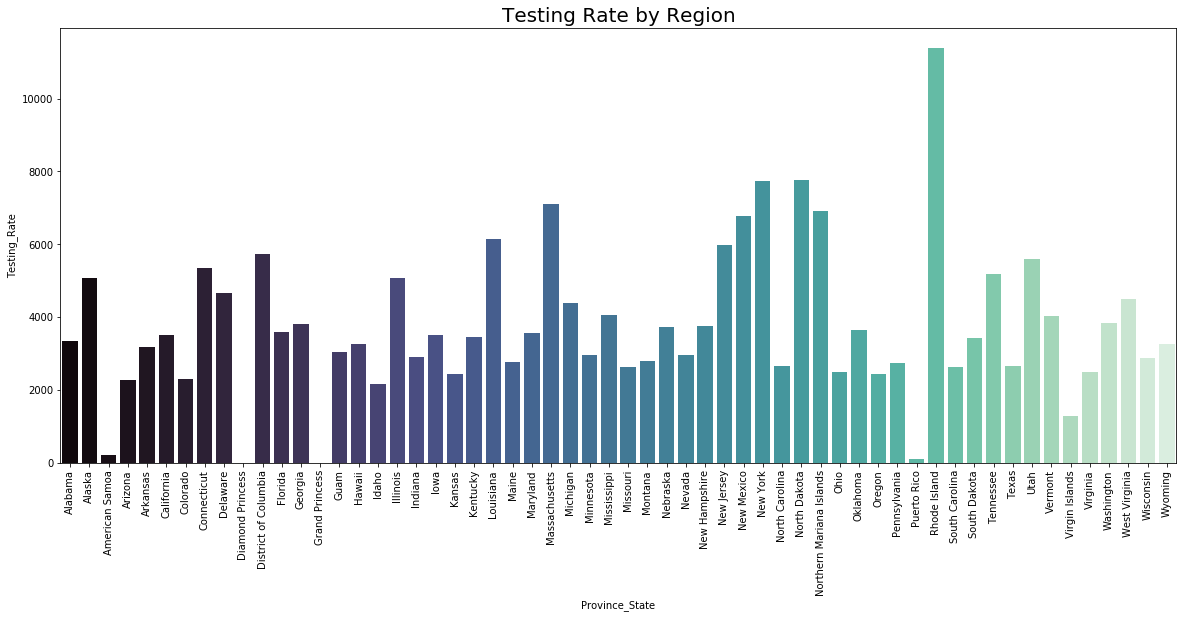

In [24]:
plt.figure(figsize=(20,8))
plt.title("Testing Rate by Region",size=20)
sns.barplot(x="Province_State", y="Testing_Rate", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

- __Rhode Island__ has the highest number testing rate 


- USA has the highest number of Covid19 cases  and the reason for that could be the high testing rate.

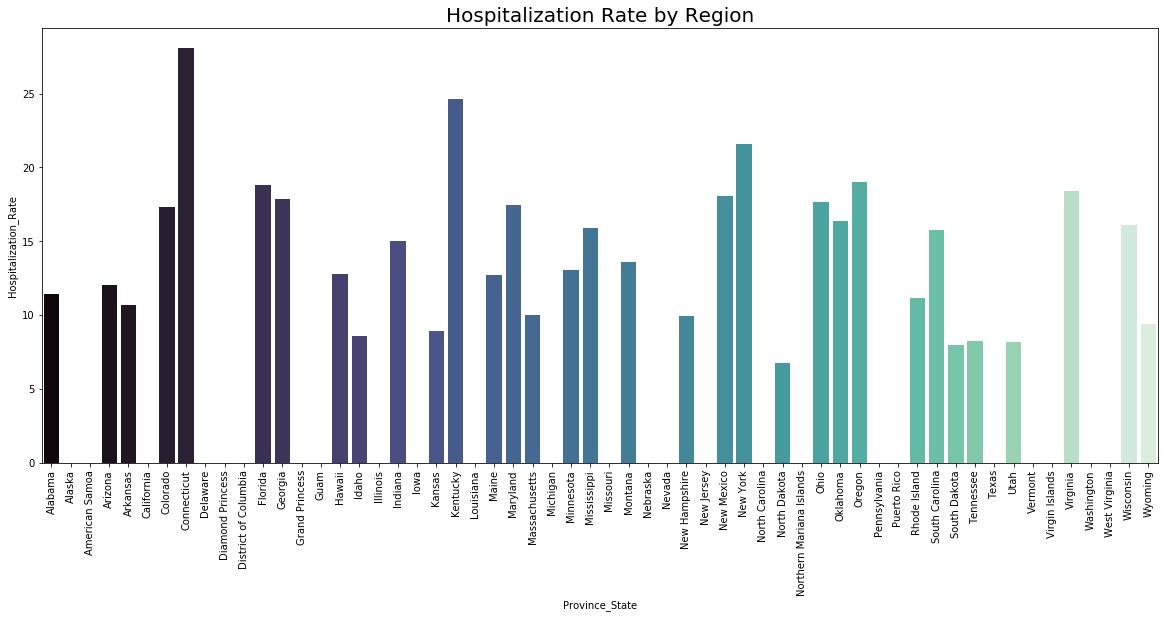

In [25]:
plt.figure(figsize=(20,8))
plt.title("Hospitalization Rate by Region",size=20)
sns.barplot(x="Province_State", y="Hospitalization_Rate", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

In [26]:
grouped_country=df.groupby(["Province_State","Dates"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

countrywise = df[df["Dates"] == df["Dates"].max()].groupby(["Province_State"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)

grouped_country=df.groupby(["Province_State","Dates"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

Text(0.5, 1.0, 'Top 15 regions as per Number of Confirmed Cases')

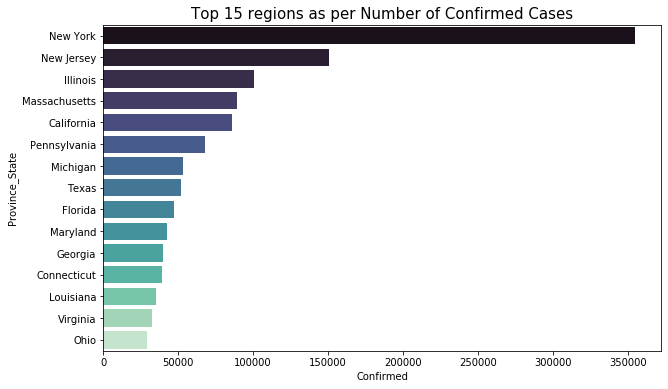

In [27]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))
top_15_confirmed = countrywise.sort_values(["Confirmed"],ascending = False).head(15)
sns.barplot(x = top_15_confirmed["Confirmed"], y = top_15_confirmed.index, ax=ax1, palette="mako")
ax1.set_title("Top 15 regions as per Number of Confirmed Cases",size=15)

#### The Top 15 regions as per Number of Confirmed Cases are

1. New York         
2. New Jersey        
3. Illinois          
4. Massachusetts      
5. California          
6. Pennsylvania        
7. Michigan            
8. Texas               
9. Florida             
10. Maryland            
11. Georgia             
12. Connecticut         
13. Louisiana           
14. Virginia            
15. Ohio   

Text(0.5, 1.0, 'Top 15 regions as per Number of Recovered Cases')

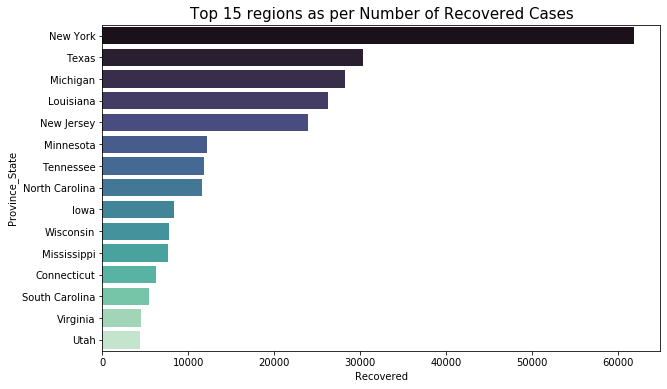

In [28]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))
top_15_recovered = countrywise.sort_values(["Recovered"],ascending = False).head(15)
sns.barplot(x = top_15_recovered["Recovered"], y = top_15_recovered.index, ax=ax1, palette="mako")
ax1.set_title("Top 15 regions as per Number of Recovered Cases",size=15)

#### The Top 15 regions as per Number of Recovered Cases are 

1. New York         
2. Texas   
3. Michigan            
4. Louisiana      
5. New Jersey        
6. Minnesota          
7. Tennessee          
8. North Carolina      
9. Iowa              
10. Wisconsin           
11. Mississippi         
12. Connecticut      
13. South Carolina       
14. Virginia           
15. Utah                

Text(0.5, 1.0, 'Top 15 regions as per Number of Death Cases')

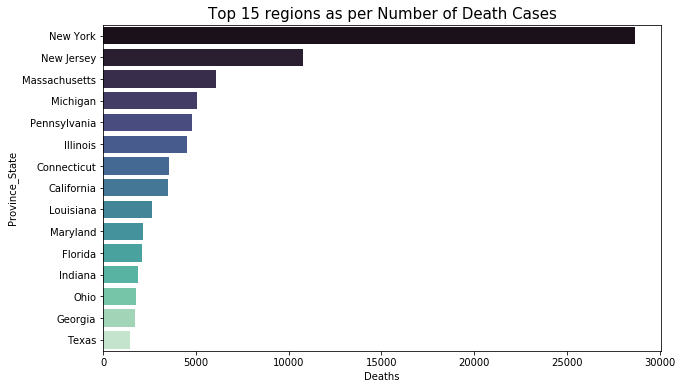

In [29]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))
top_15_deaths = countrywise.sort_values(["Deaths"], ascending=False).head(15)
sns.barplot(x = top_15_deaths["Deaths"], y = top_15_deaths.index, ax = ax1, palette="mako")
ax1.set_title("Top 15 regions as per Number of Death Cases",size=15)

#### The Top 15 regions as per Number of Death Cases are

1. New York          
2. New Jersey        
3. Massachusetts     
4. Michigan         
5. Pennsylvania      
6. Illinois           
7. Connecticut       
8. California          
9. Louisiana           
10. Maryland           
11. Florida             
12. Indiana             
13. Ohio                
14. Georgia             
15. Texas        

In [30]:
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 0, 'Mortality (in Percentage)')

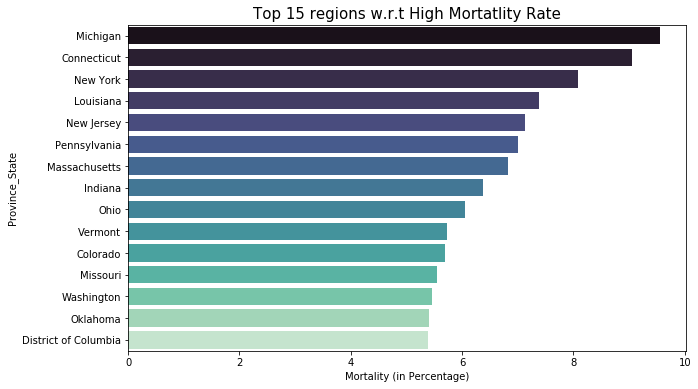

In [31]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))

countrywise_plot_mortal = countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1, palette="mako")
ax1.set_title("Top 15 regions w.r.t High Mortatlity Rate",size=15)
ax1.set_xlabel("Mortality (in Percentage)")

#### The Top 15 regions w.r.t High Mortatlity Rate are

1. Michigan                  
2. Connecticut               
3. New York                 
4. Louisiana                 
5. New Jersey              
6. Pennsylvania              
7. Massachusetts            
8. Indiana                   
9. Ohio                      
10. Vermont                    
11. Colorado                 
12. Missouri                  
13. Washington                
14. Oklahoma                  
15. District of Columbia  

Text(0.5, 0, 'Recovery (in Percentage)')

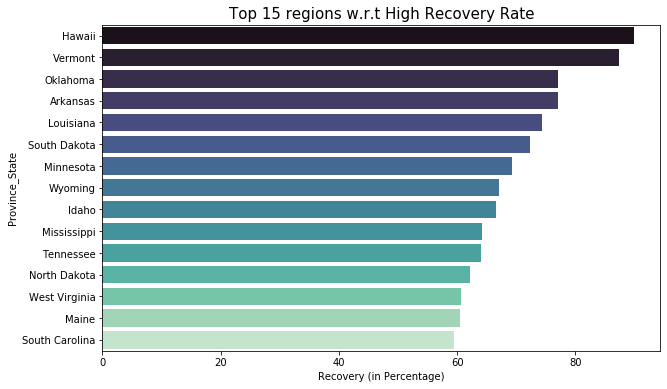

In [32]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))

countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax1, palette="mako")
ax1.set_title("Top 15 regions w.r.t High Recovery Rate",size=15)
ax1.set_xlabel("Recovery (in Percentage)")

#### The Top 15 regions w.r.t High Recovery Rate are

1. Hawaii             
2. Vermont           
3. Oklahoma       
4. Arkansas           
5. Louisiana      
6. South Dakota      
7. Minnesota         
8. Wyoming             
9. Idaho             
10. Mississippi      
11. Tennessee        
12. North Dakota      
13. West Virginia     
14. Maine              
15. South Carolina  

Text(0.5, 0, 'Mortality (in Percentage)')

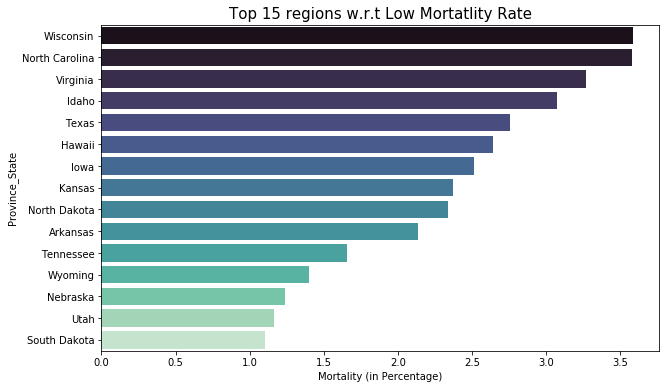

In [33]:
fig, (ax1) = plt.subplots(1, 1,figsize=(10,6))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1, palette="mako")
ax1.set_title("Top 15 regions w.r.t Low Mortatlity Rate",size=15)
ax1.set_xlabel("Mortality (in Percentage)")

#### The Top 15 regions w.r.t Low Mortatlity Rate are

1. Wisconsin       
2. North Carolina    
3. Virginia            
4. Idaho            
5. Texas           
6. Hawaii    
7. Iowa        
8. Kansas         
9. North Dakota      
10. Arkansas         
11. Tennessee        
12. Wyoming      
13. Nebraska       
14. Utah               
15. South Dakota

Text(0.5, 1.0, 'Top 15 regions with Most Number of Active Cases')

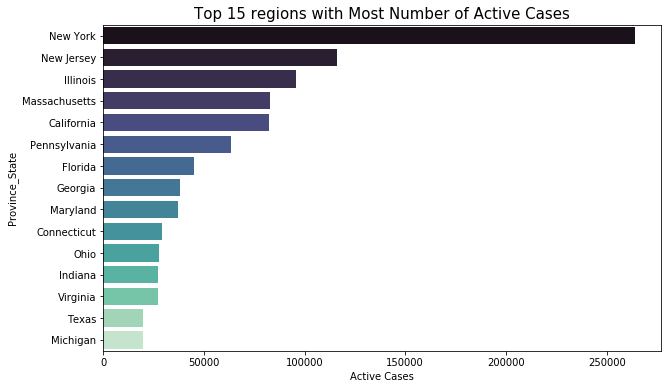

In [34]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))

countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1, palette="mako")
ax1.set_title("Top 15 regions with Most Number of Active Cases",size=15)

#### The Top 15 regions with Most Number of Active Cases are

1. New York            
2. New Jersey        
3. Illinois            
4. Massachusetts      
5. California           
6. Pennsylvania        
7. Florida             
8. Georgia             
9. Maryland           
10. Connecticut         
11. Ohio                 
12. Indiana              
13. Virginia            
14. Texas                
15. Michigan             

Text(0.5, 1.0, 'Top 15 regions with Most Number of Closed Cases')

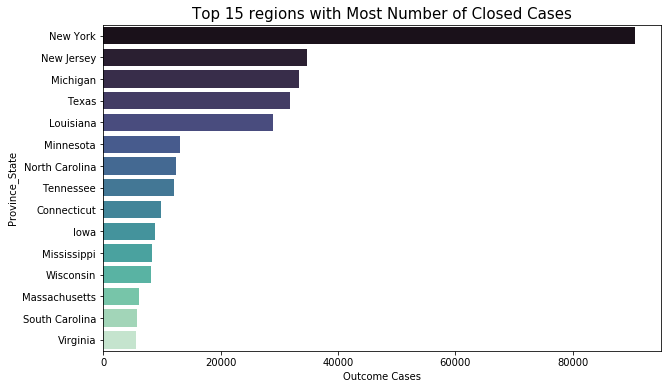

In [35]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))

countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax1, palette="mako")
ax1.set_title("Top 15 regions with Most Number of Closed Cases",size=15)

#### The Top 15 regions with Most Number of Closed Cases are

1. New York          
2. New Jersey     
3. 0Michigan     
4. Texas              
5. Louisiana    
6. Minnesota            
7. North Carolina    
8. Tennessee          
9. Connecticut        
10. Iowa                
11. Mississippi       
12. Wisconsin         
13. Massachusetts        
14. South Carolina       
15. Virginia            

# Conclusion


- It is believed that New York is the most severly hit region in the US, because it has the highest number of Active cases and death cases, however New York also has the highest recovery rate also New York has the highest number of closed cases.


- When explored further it can be noticed that New York and New Jersy have an almost equal incident rate.


- Another reason for New York having the most number of active cases could be that New York has the highest testing rate, but the rest of the regions have very low testing rate when compared. Only New York and California have high testing rate.


- Even though USA is severly struck, the hospitalization rate isn't high for any of the regions except for New York.


- Even though the graph for deaths shows a very uneven distribution, the graph for mortality rate is fairly high and almost even across all regions hence, it is not easy to conclude that only one region is severly struck. 